In [1]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Loading Dataset
from google.colab import files
uploaded = files.upload()

Saving Tweet_NFT.xlsx - Sheet1.csv to Tweet_NFT.xlsx - Sheet1.csv


In [60]:
# Importing the dataset
DATASET_COLUMNS=['id','tweet_text','tweet_created_at','tweet_intent']
DATASET_ENCODING = "ISO-8859-1"
import pandas as pd
df = pd.read_csv('Tweet_NFT.xlsx - Sheet1.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)
df.dropna(inplace=True)
print(df)

            id                                         tweet_text  \
0           id                                         tweet_text   
1      1212762  @crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...   
2      1212763  Need Sick Character artÃ¢Ââ#art #artist #Ar...   
3      1212765  @The_Hulk_NFT @INagotchiNFT @Tesla @killabears...   
4      1212766  @CryptoBatzNFT @DarekBTW The first project in ...   
...        ...                                                ...   
96360  1424490  @nft_cryptogang @liuyan93721534 0x9fE808D8a9E2...   
96361  1424491  Just registered to win @cryptopunksnfts #1859 ...   
96362  1424494  @SolSniffer Dyor on the nft collection "Dictat...   
96363  1424497  #NFT #NFTCommmunity #DeltaFlare\nJoin me on Di...   
96364  1424498  @DuckBathing @diozoth @elonmusk @richerd @John...   

               tweet_created_at  tweet_intent  
0              tweet_created_at  tweet_intent  
1      2022-08-06T16:56:36.000Z     Community  
2      2022-08-06T16:56:36.

In [61]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,id,tweet_text,tweet_created_at,tweet_intent
1,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
2,1212763,Need Sick Character artÃ¢Ââ#art #artist #Ar...,2022-08-06T16:56:36.000Z,Giveaway
3,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
4,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community


In [29]:
df.columns

Index(['id', 'tweet_text', 'tweet_created_at', 'tweet_intent'], dtype='object')

In [62]:
print('length of data is',len(df))

length of data is 96365


In [63]:
df.shape

(96365, 4)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96365 entries, 0 to 96364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                96365 non-null  object
 1   tweet_text        96365 non-null  object
 2   tweet_created_at  96365 non-null  object
 3   tweet_intent      96365 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


In [65]:
df.dtypes

id                  object
tweet_text          object
tweet_created_at    object
tweet_intent        object
dtype: object

In [66]:
import numpy as np
np.sum(df.isnull().any(axis=1))

0

In [67]:
print('count of columns in the data is: ', len(df.columns))
print('count of rows in the data: ', len(df))

count of columns in the data is:  4
count of rows in the data:  96365


In [68]:
df['tweet_intent'].unique()

array(['tweet_intent', 'Community', 'Giveaway', 'Appreciation', 'Presale',
       'Whitelist', 'pinksale', 'Done', 'Interested', 'Launching Soon'],
      dtype=object)

In [69]:
df['tweet_intent'].nunique()

10

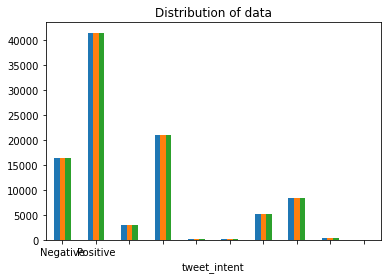

In [70]:
# Plotting the distribution for dataset.
ax = df.groupby('tweet_intent').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet_text']), list(df['tweet_intent'])

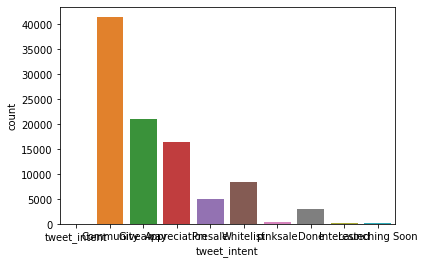

In [71]:
import seaborn as sns
sns.countplot(x='tweet_intent', data=df)

In [72]:
data = df[['tweet_text', 'tweet_intent']]

In [73]:
data['tweet_intent']=data['tweet_intent'].replace(4,1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
data['tweet_intent'].unique()

array(['tweet_intent', 'Community', 'Giveaway', 'Appreciation', 'Presale',
       'Whitelist', 'pinksale', 'Done', 'Interested', 'Launching Soon'],
      dtype=object)

In [75]:
data_pos=data[data['tweet_intent']==1]
data_neg=data[data['tweet_intent']==0]

In [76]:
data_pos=data_pos.iloc[:int(20000)]
data_neg=data_neg.iloc[:int(20000)]

In [77]:
import pandas as pd
dataset=pd.concat([data_pos,data_neg])

In [121]:
dataset['tweet_text']=dataset['tweet_text'].str.lower()
dataset['tweet_text'].tail()

Series([], Name: tweet_text, dtype: object)

In [79]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [80]:
STOPWORDS=set(stopwordlist)
def cleaning_stopwords(tweet_text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweet_text']=dataset['tweet_text'].apply(lambda tweet_text: cleaning_stopwords(tweet_text))
dataset['tweet_text'].head()

Series([], Name: tweet_text, dtype: object)

In [81]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(tweet_text):
    translator = str.maketrans('', '', punctuations_list)
    return tweet_text.translate(translator)
dataset['tweet_text']= dataset['tweet_text'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet_text'].tail()

Series([], Name: tweet_text, dtype: object)

In [82]:
def cleaning_repeating_char(tweet_text):
    return re.sub(r'(.)1+', r'1', tweet_text)
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda x: cleaning_repeating_char(x))
dataset['tweet_text'].tail()

Series([], Name: tweet_text, dtype: object)

In [83]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda x: cleaning_URLs(x))
dataset['tweet_text'].tail()

Series([], Name: tweet_text, dtype: object)

In [84]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda x: cleaning_numbers(x))
dataset['tweet_text'].tail()

Series([], Name: tweet_text, dtype: object)

In [85]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['tweet_text'] = dataset['tweet_text'].apply(tokenizer.tokenize)
dataset['tweet_text'].head()

Series([], Name: tweet_text, dtype: object)

In [86]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['tweet_text']= dataset['tweet_text'].apply(lambda x: stemming_on_text(x))
dataset['tweet_text'].head()

Series([], Name: tweet_text, dtype: object)

In [87]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda x: lemmatizer_on_text(x))
dataset['tweet_text'].head()

Series([], Name: tweet_text, dtype: object)

In [88]:
x=data.tweet_text
y=data.tweet_intent

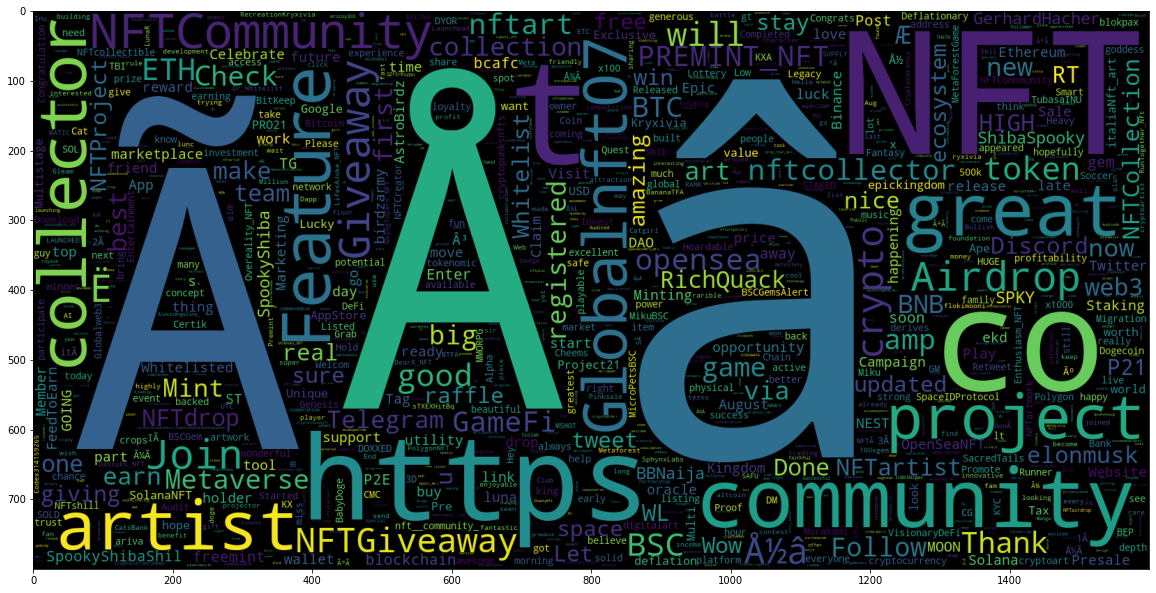

In [89]:
data_neg = data['tweet_text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [90]:
# Separating the 95% data for training data and 5% for testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state =26105111)

In [91]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [92]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

In [111]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred=model.predict(x_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  

In [112]:
df.isnull().sum()

id                  0
tweet_text          0
tweet_created_at    0
tweet_intent        0
dtype: int64

In [118]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

  Appreciation       0.70      0.94      0.80       824
     Community       0.94      0.95      0.94      2047
          Done       1.00      0.05      0.10       150
      Giveaway       0.87      0.93      0.90      1074
    Interested       0.00      0.00      0.00        16
Launching Soon       0.00      0.00      0.00        12
       Presale       0.98      0.83      0.90       274
     Whitelist       0.93      0.59      0.72       397
      pinksale       0.00      0.00      0.00        25

      accuracy                           0.87      4819
     macro avg       0.60      0.48      0.49      4819
  weighted avg       0.88      0.87      0.85      4819



In [120]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(x_test)

                precision    recall  f1-score   support

  Appreciation       0.96      0.97      0.97       824
     Community       0.97      0.99      0.98      2047
          Done       0.99      1.00      0.99       150
      Giveaway       0.99      0.98      0.98      1074
    Interested       0.88      0.94      0.91        16
Launching Soon       1.00      1.00      1.00        12
       Presale       0.98      0.99      0.99       274
     Whitelist       0.96      0.85      0.90       397
      pinksale       1.00      0.96      0.98        25

      accuracy                           0.97      4819
     macro avg       0.97      0.96      0.97      4819
  weighted avg       0.97      0.97      0.97      4819



In [113]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(x_test)

                precision    recall  f1-score   support

  Appreciation       0.94      0.97      0.95       824
     Community       0.96      0.99      0.98      2047
          Done       0.98      0.96      0.97       150
      Giveaway       0.98      0.96      0.97      1074
    Interested       0.83      0.62      0.71        16
Launching Soon       1.00      0.83      0.91        12
       Presale       0.99      0.97      0.98       274
     Whitelist       0.96      0.82      0.88       397
      pinksale       1.00      0.92      0.96        25

      accuracy                           0.96      4819
     macro avg       0.96      0.89      0.92      4819
  weighted avg       0.96      0.96      0.96      4819

